# Importing Libraries

In [7]:
# Kishore Chandran
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

# Checking the Data Characterestics


In [8]:
df = pd.read_csv("Admn.csv")
print(df.head())
print("\n")
print(df.info())
print("\n")
print(df.describe())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  

# checking outliers

In [9]:
print("........Checking outliers........")
print(df['GRE Score'].mean()," ",df['GRE Score'].median())
print(df['TOEFL Score'].mean()," ",df['TOEFL Score'].median())
print(df['University Rating'].mean()," ",df['University Rating'].median())
print(df['SOP'].mean()," ",df['SOP'].median())
print(df['LOR '].mean()," ",df['LOR '].median())
print(df['CGPA'].mean()," ",df['CGPA'].median())
print(df['GRE Score'].mean()," ",df['GRE Score'].median())
print(df['Research'].mean()," ",df['Research'].median())
print(df['Chance of Admit '].mean()," ",df['Chance of Admit '].median())

........Checking outliers........
316.472   317.0
107.192   107.0
3.114   3.0
3.374   3.5
3.484   3.5
8.576439999999998   8.56
316.472   317.0
0.56   1.0
0.72174   0.72


### Mean and Median are close to each other so no aberrant values found

# Feature selection


## Deleting "serial no" column as it does not contribute to the regression

In [10]:
print("\n.........After deleting serial no. column.......")
df = df.iloc[:,1:]
print(df.info())


.........After deleting serial no. column.......
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None


## Creating pairplots

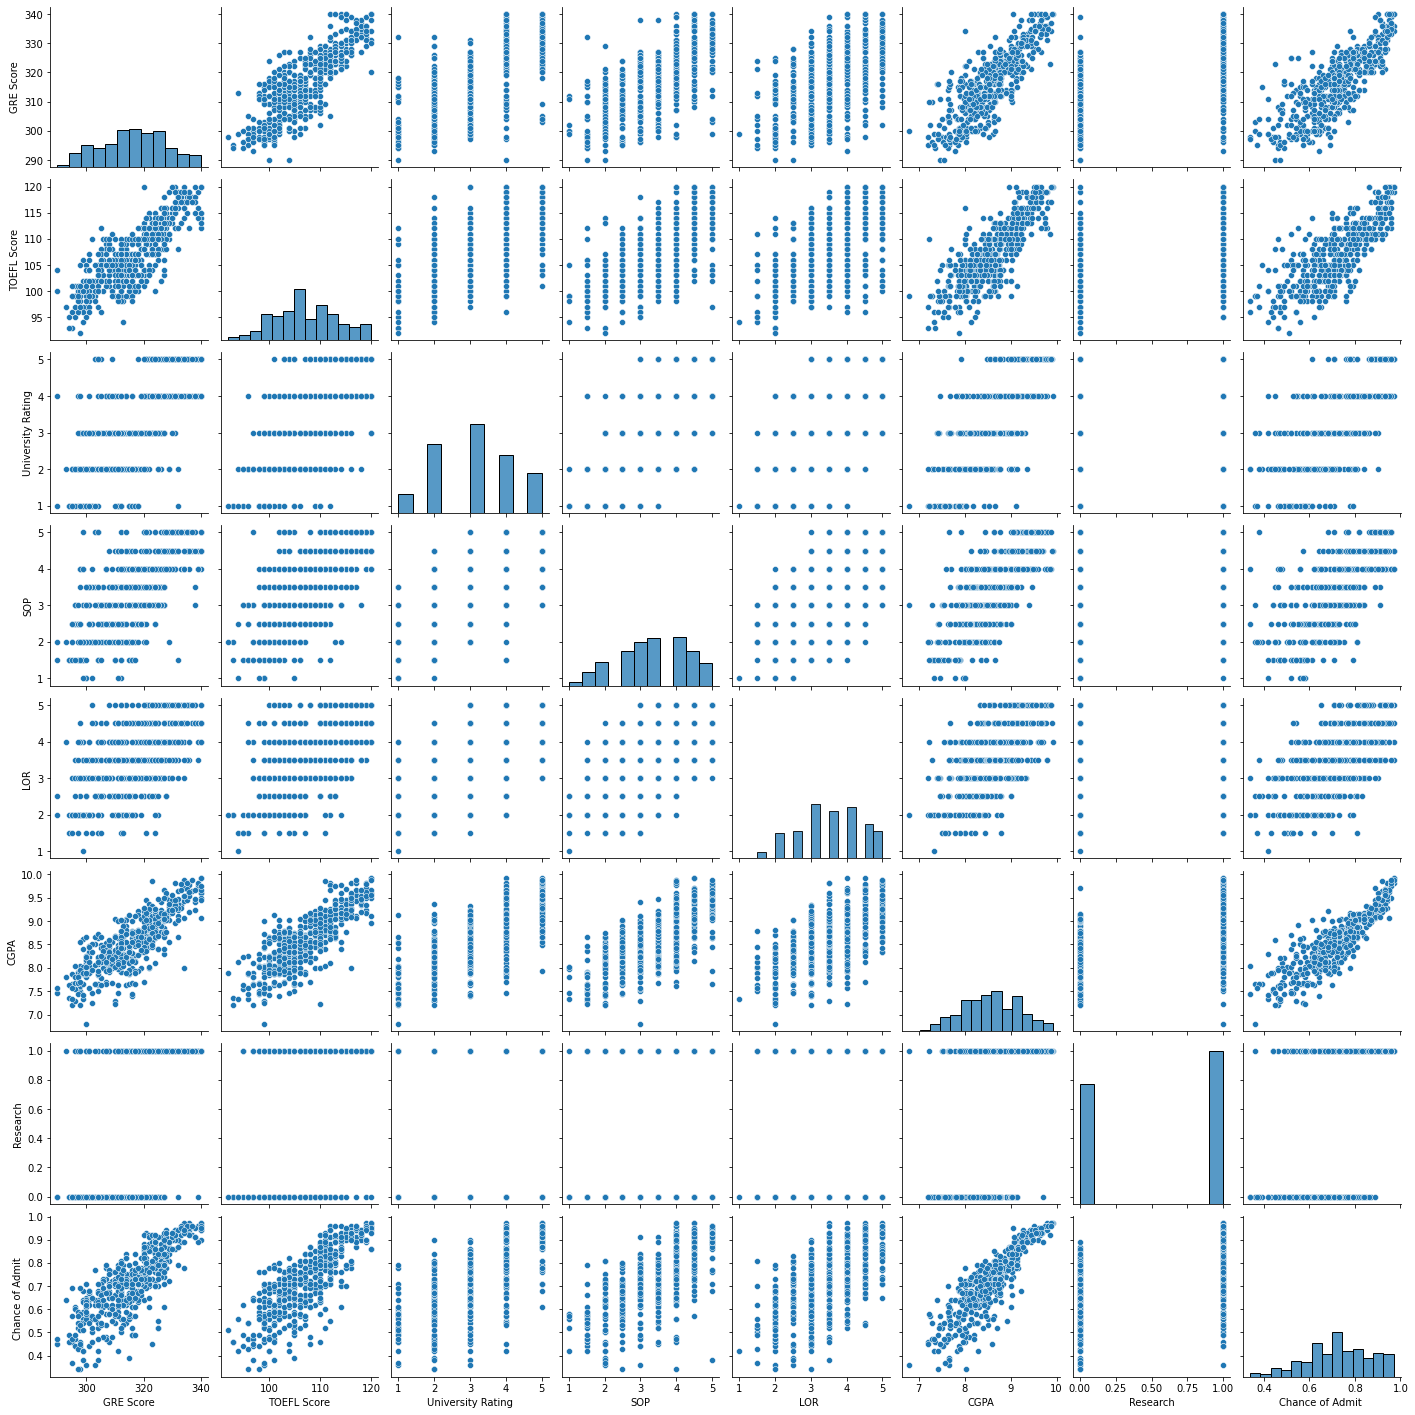

In [11]:
sns.pairplot(df)

# Splitting data to x and y

In [12]:
print("\n")
x = df[['GRE Score','TOEFL Score','CGPA']]
y = df.iloc[:,-1].values
print("............x values......... \n",x)
print("\n")
print("............y values......... \n",y)
print("\n")




............x values......... 
      GRE Score  TOEFL Score  CGPA
0          337          118  9.65
1          324          107  8.87
2          316          104  8.00
3          322          110  8.67
4          314          103  8.21
..         ...          ...   ...
495        332          108  9.02
496        337          117  9.87
497        330          120  9.56
498        312          103  8.43
499        327          113  9.04

[500 rows x 3 columns]


............y values......... 
 [0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.

# Checking for null values

In [13]:
print(df.isna().sum())
print("\n")

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64




#### No null values found

## Creating correlation heatmap


                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.827200           0.635376  0.613498   
TOEFL Score         0.827200     1.000000           0.649799  0.644410   
University Rating   0.635376     0.649799           1.000000  0.728024   
SOP                 0.613498     0.644410           0.728024  1.000000   
LOR                 0.524679     0.541563           0.608651  0.663707   
CGPA                0.825878     0.810574           0.705254  0.712154   
Research            0.563398     0.467012           0.427047  0.408116   
Chance of Admit     0.810351     0.792228           0.690132  0.684137   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.524679  0.825878  0.563398          0.810351  
TOEFL Score        0.541563  0.810574  0.467012          0.792228  
University Rating  0.608651  0.705254  0.427047          0.690132  
SOP                0.663707  0.712154  0.408116          0.68

<AxesSubplot:>

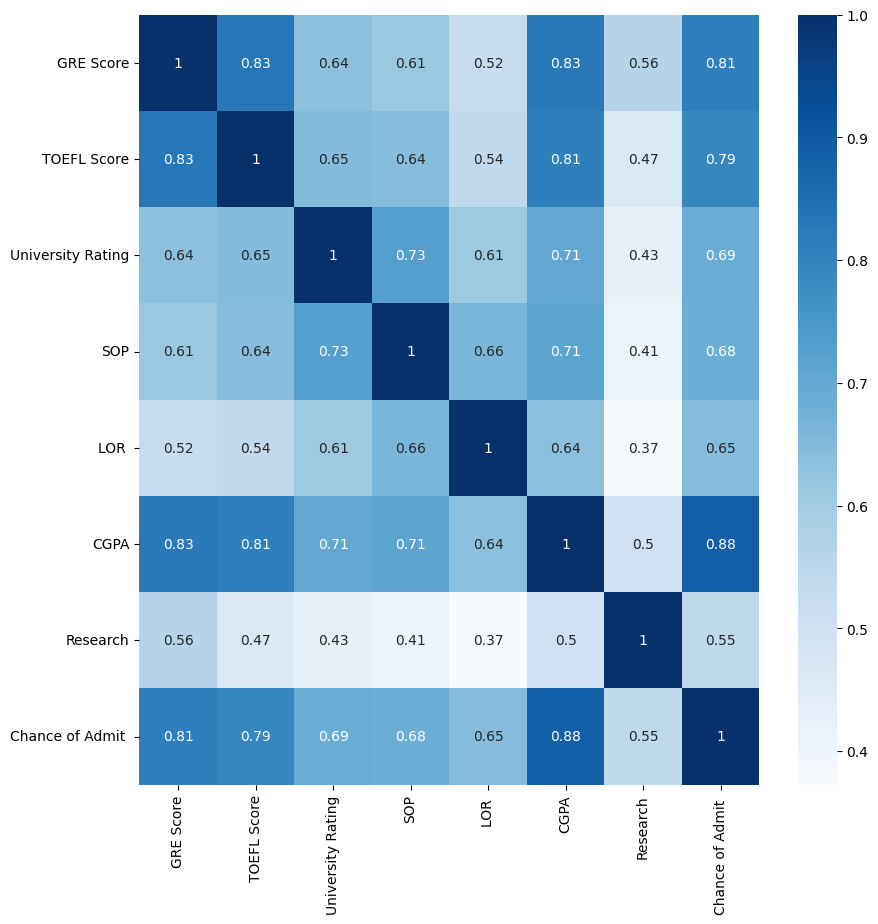

In [14]:
corr_matrix = df.corr().abs()
print(corr_matrix)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Feature scaling


In [15]:
sc = StandardScaler()
x = sc.fit_transform(x)
print("x values after scaling\n",x)
print("\n")

x values after scaling
 [[ 1.81923762  1.77886545  1.77680627]
 [ 0.66714832 -0.03160087  0.48585943]
 [-0.0418297  -0.52536441 -0.95404281]
 ...
 [ 1.19888185  2.10804114  1.62785086]
 [-0.39631872 -0.68995225 -0.24236699]
 [ 0.93301508  0.95592621  0.76721964]]




# Creating training and test data


In [16]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.1,random_state=550)
lr = LinearRegression()
lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_te)

###  Creating pairplot dependent vs indpendent varables


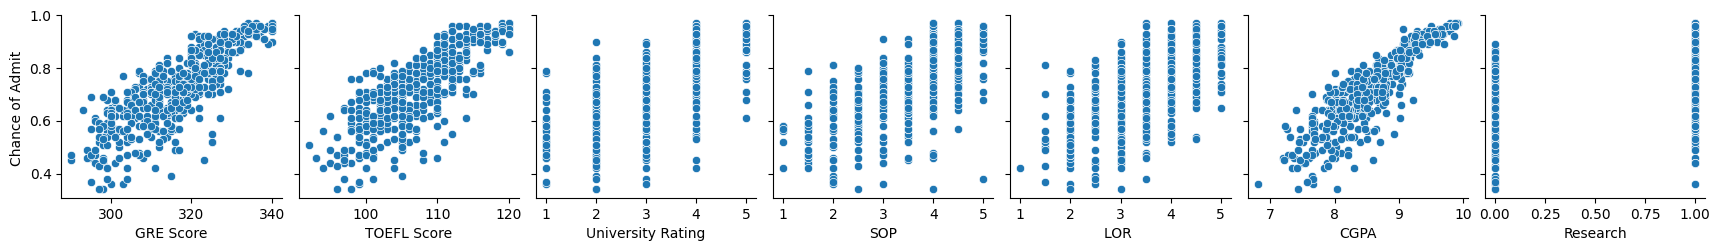

In [17]:
sns.pairplot(df,x_vars=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'],y_vars=['Chance of Admit '])
plt.show()

###  plotting density plots for actual and predicted values
        

C:\Users\USER\PycharmProjects\study\MLT  Project\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\PycharmProjects\study\MLT  Project\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

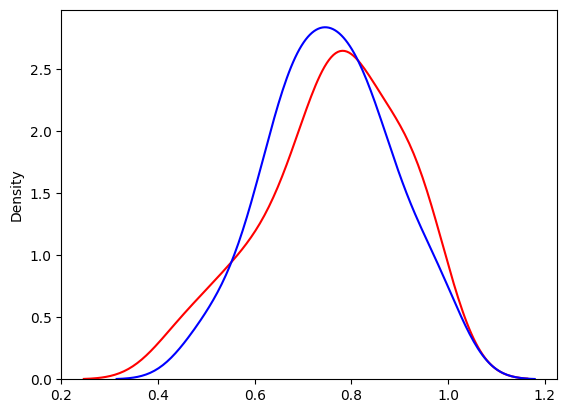

In [25]:
ax1 = sns.distplot(y_te, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

### Finding pearson correlation coefficient btw. actual an pred. value

In [26]:

from scipy.stats import pearsonr
corr, _ = pearsonr(y_te,y_pred)
print("\nPearson correlation coefficient = ",corr)


Pearson correlation coefficient =  0.9208833980800818


### find mse r2 score and rmse

In [27]:

mse = mean_squared_error(y_te,y_pred)
r2 = r2_score(y_te,y_pred)
rmse = np.sqrt(mse)
print("MSE = ",mse)
print("r2 score = ",r2)
print("RMSE = ",rmse)

MSE =  0.003027081093883158
r2 score =  0.8449876539387977
RMSE =  0.05501891578251209


In [ ]:
Using Multiple Linear regression the model will have accuracy of nearly 85% (ie: 84.9%)